В искусственном интеллекте и машинном обучении — задача разделения множества наблюдений (объектов) на группы, называемые классами, на основе анализа их формального описания. При классификации каждая единица наблюдения относится определенной группе или номинальной категории на основе некоторого качественного свойства.

Задача классификации применяется во многих областях:

- в торговле — классификация клиентов и товаров позволяет оптимизировать маркетинговые стратегии, стимулировать продажи, сокращать издержки

- в сфере телекоммуникаций — классификация абонентов позволяет определять уровень лояльности, разрабатывать программы лояльности

- в медицине и здравоохранении — диагностика заболеваний, классификация населения по группам риска

- в банковской сфере — кредитный скоринг.

In [3]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  diabetes  
0                       0.627   50         1  
1                       0.351   31         0  
2                       0.672   32         1  
3                       0.167   21         0  
4                       2.288   33         1  
..                        ...  ...       ...  
763                     0.171   63         0  
764                     0.340   27         0  
765                     0.245   30         0  
766                     0.349   47         1  
767                     0.315   23         0  

[768 rows x 9 columns]

Pregnancies: количество беременностей

Glucose: концентрация глюкозы в плазме через 2 часа в пероральном тесте на толерантность к глюкозе.

BloodPressure: диастолическое артериальное давление

SkinThickness: толщина кожной складки трицепса

Insulin: инсулин сыворотки после приема пищи

BMI: индекс массы тела

DiabetesPedigreeFunction: функция диабетической семьи

Age: Возраст

diabetes: цель, 0 означает отсутствие болезни, 1 означает болезнь

In [5]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
diabetes                  768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
diabetes                    0.0000    1.00000    1.00

In [12]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  diabetes  
0                       0.627   50         1  
1                       0.351   31         0  
2                       0.672   32         1  
3                       0.167   21         0  
4                       2.288   33         1  
..                        ...  ...       ...  
763                     0.171   63         0  
764                     0.340   27         0  
765                     0.245   30         0  
766                     0.349   47         1  
767                     0.315   23         0  

[768 rows x 9 columns]

In [6]:
df["diabetes"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [7]:
df["diabetes"].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='diabetes', ylabel='count'>

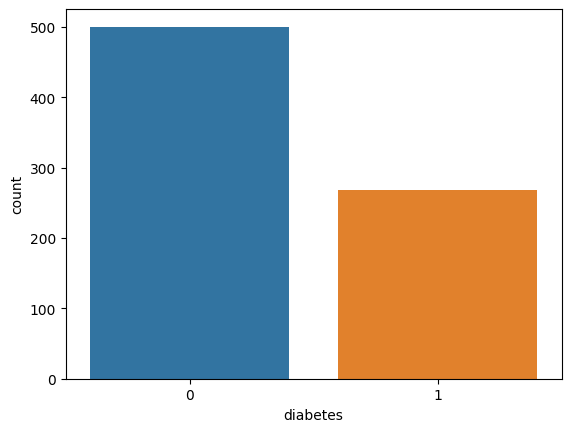

In [9]:
import seaborn as sns

sns.countplot(df, x="diabetes")

#### Заполнение пропусков медианой

In [15]:
df_temp = df.drop(["Pregnancies", "diabetes"], axis=1)
df_temp

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35        0  33.6   
1         85             66             29        0  26.6   
2        183             64              0        0  23.3   
3         89             66             23       94  28.1   
4        137             40             35      168  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48      180  32.9   
764      122             70             27        0  36.8   
765      121             72             23      112  26.2   
766      126             60              0        0  30.1   
767       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 7 columns]

In [17]:
median = df_temp.median()
median

Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [19]:
df_without_zero = df_temp.replace(0, median)
df_without_zero

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35     30.5  33.6   
1         85             66             29     30.5  26.6   
2        183             64             23     30.5  23.3   
3         89             66             23     94.0  28.1   
4        137             40             35    168.0  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48    180.0  32.9   
764      122             70             27     30.5  36.8   
765      121             72             23    112.0  26.2   
766      126             60             23     30.5  30.1   
767       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 7 columns]

In [20]:
df_without_zero["Pregnancies"] = df["Pregnancies"]
df_without_zero["diabetes"] = df["diabetes"]
df_without_zero

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        148             72             35     30.5  33.6   
1         85             66             29     30.5  26.6   
2        183             64             23     30.5  23.3   
3         89             66             23     94.0  28.1   
4        137             40             35    168.0  43.1   
..       ...            ...            ...      ...   ...   
763      101             76             48    180.0  32.9   
764      122             70             27     30.5  36.8   
765      121             72             23    112.0  26.2   
766      126             60             23     30.5  30.1   
767       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Pregnancies  diabetes  
0                       0.627   50            6         1  
1                       0.351   31            1         0  
2                       0.672   32            8         1  
3                       0.167   21            1         0  
4                       2.288   33            0         1  
..                        ...  ...          ...       ...  
763                     0.171   63           10         0  
764                     0.340   27            2         0  
765                     0.245   30            5         0  
766                     0.349   47            1         1  
767                     0.315   23            1         0  

[768 rows x 9 columns]

In [21]:
df_without_zero.corr()

Glucose  BloodPressure  SkinThickness   Insulin  \
Glucose                   1.000000       0.218937       0.172143  0.357573   
BloodPressure             0.218937       1.000000       0.147809 -0.028721   
SkinThickness             0.172143       0.147809       1.000000  0.238188   
Insulin                   0.357573      -0.028721       0.238188  1.000000   
BMI                       0.231400       0.281132       0.546951  0.189022   
DiabetesPedigreeFunction  0.137327      -0.002378       0.142977  0.178029   
Age                       0.266909       0.324915       0.054514 -0.015413   
Pregnancies               0.128213       0.208615       0.032568 -0.055697   
diabetes                  0.492782       0.165723       0.189065  0.148457   

                               BMI  DiabetesPedigreeFunction       Age  \
Glucose                   0.231400                  0.137327  0.266909   
BloodPressure             0.281132                 -0.002378  0.324915   
SkinThickness             0.546951                  0.142977  0.054514   
Insulin                   0.189022                  0.178029 -0.015413   
BMI                       1.000000                  0.153506  0.025744   
DiabetesPedigreeFunction  0.153506                  1.000000  0.033561   
Age                       0.025744                  0.033561  1.000000   
Pregnancies               0.021546                 -0.033523  0.544341   
diabetes                  0.312249                  0.173844  0.238356   

                          Pregnancies  diabetes  
Glucose                      0.128213  0.492782  
BloodPressure                0.208615  0.165723  
SkinThickness                0.032568  0.189065  
Insulin                     -0.055697  0.148457  
BMI                          0.021546  0.312249  
DiabetesPedigreeFunction    -0.033523  0.173844  
Age                          0.544341  0.238356  
Pregnancies                  1.000000  0.221898  
diabetes                     0.221898  1.000000

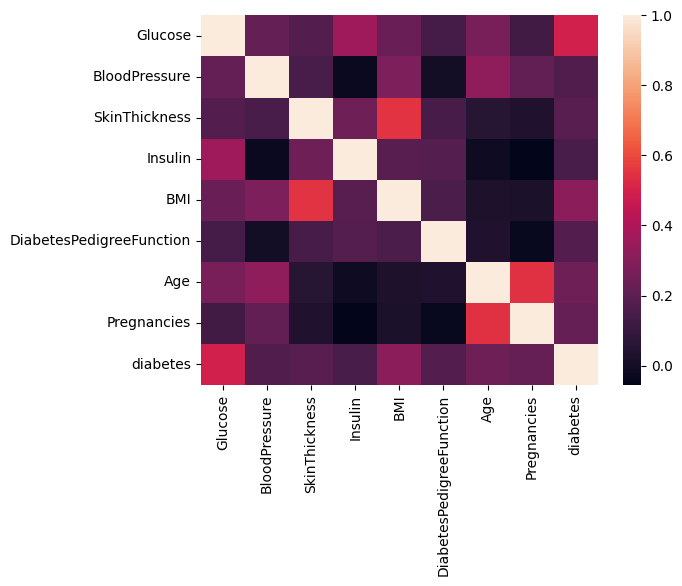

In [24]:
sns.heatmap(df_without_zero.corr());

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


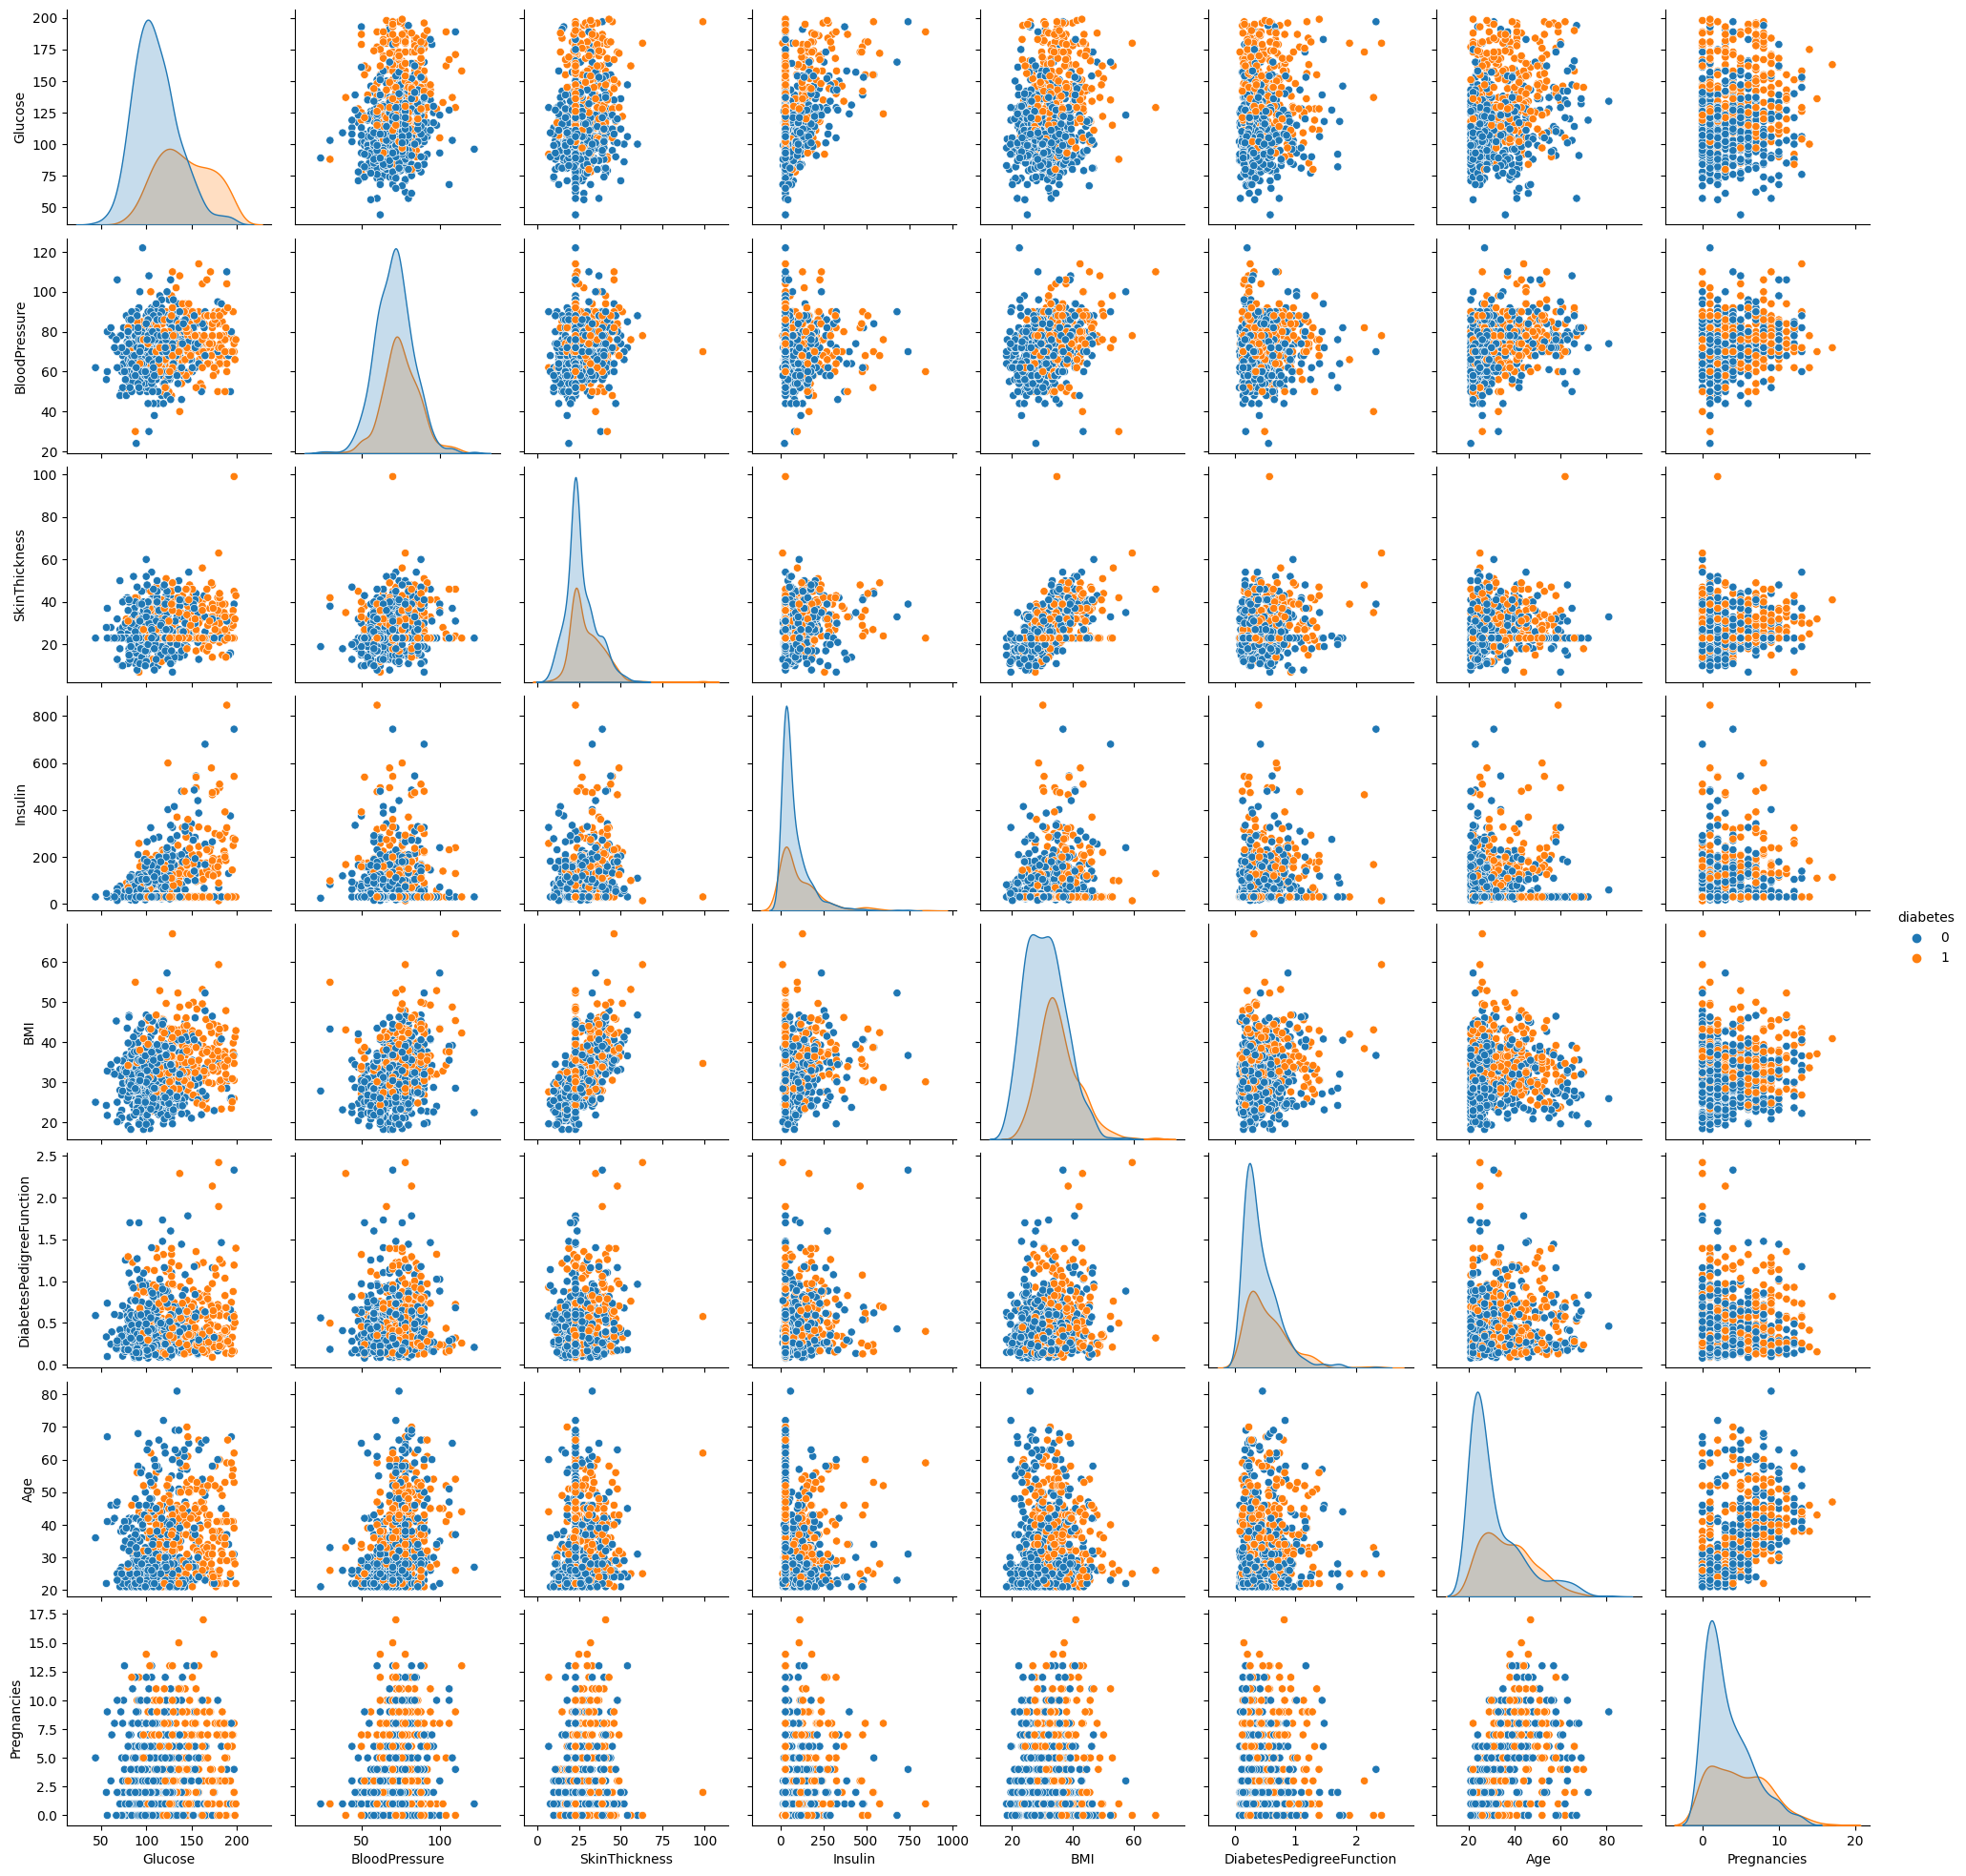

In [25]:
sns.pairplot(data=df_without_zero, diag_kind="kde", hue="diabetes")

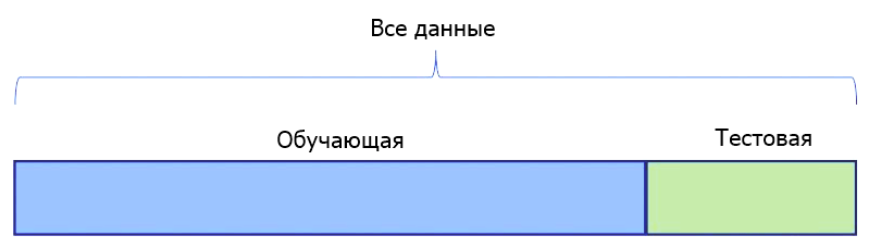

Важная проблема - переобучение

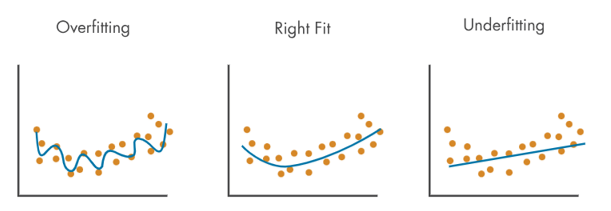

Разделим на две части и обучим knn

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X = df_without_zero.drop(["diabetes"], axis=1)
y = df_without_zero["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7077922077922078

Как выглядит перекрестная проверка

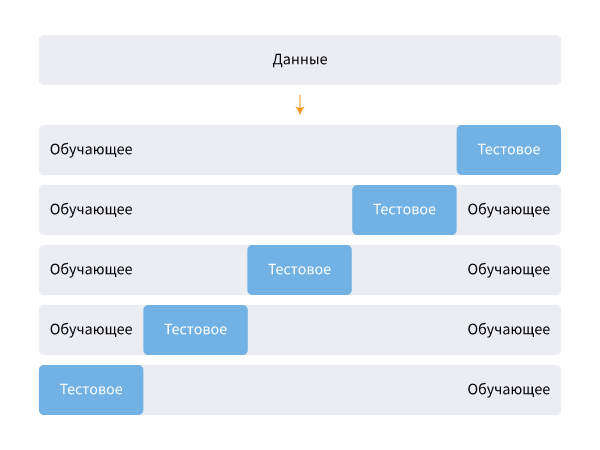

Как реализовать перекрестную проверку

In [36]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(i)
    print(train_index)

KFold(n_splits=5, random_state=None, shuffle=False)
0
[154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 3

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
scores

array([0.7012987 , 0.64285714, 0.75324675, 0.76470588, 0.67320261])

In [38]:
np.mean(scores)

0.7070622188269248

А если у модели есть гиперпараметры?

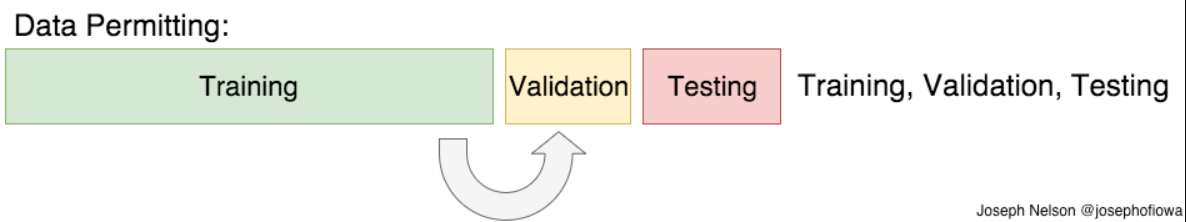

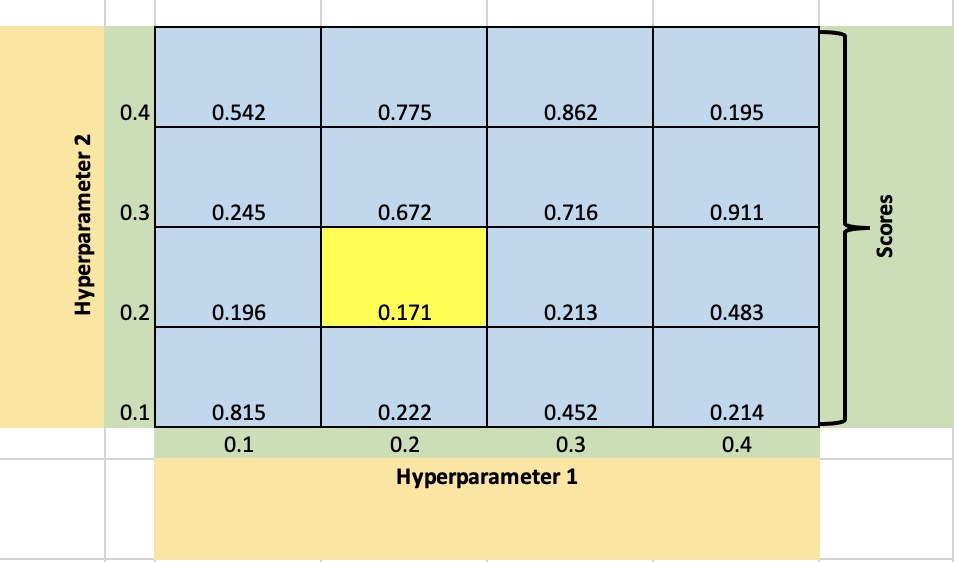

Подбор параметров с кросс валидацией

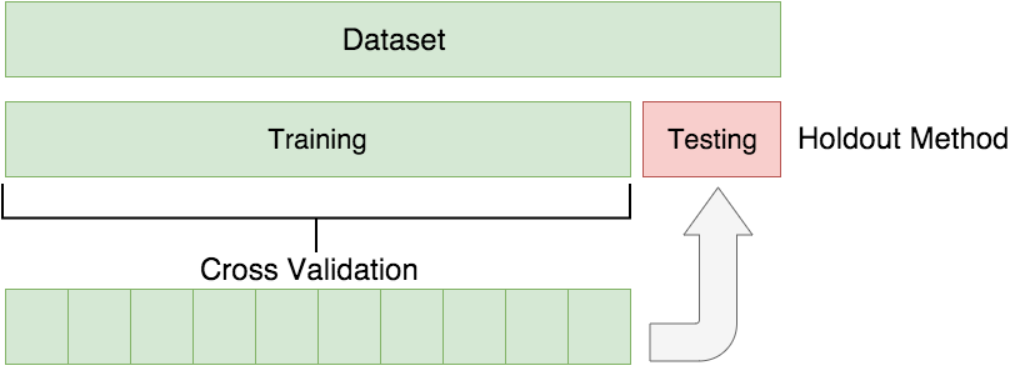

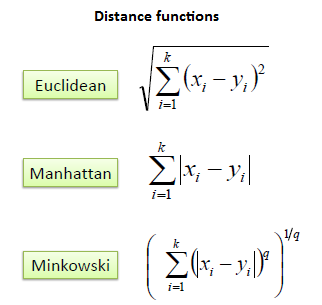

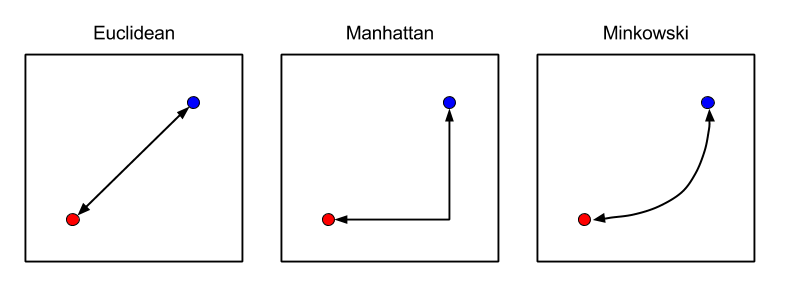

In [39]:
from sklearn.model_selection import GridSearchCV

In [47]:
n_neighbors = list(range(1, 31))
weights = ["uniform", "distance"]
p = [1, 2, 3, 4]

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)
hyperparameters

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'weights': ['uniform', 'distance'],
 'p': [1, 2, 3, 4]}

In [50]:
model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=2)

In [51]:
search.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, 

[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=4, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_n

[CV] END ................n_neighbors=4, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=4, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=4, p=3, weights=distance; total time=   0.0s
[CV] END ................n_n

[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=6, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=6, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=6, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_ne

[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=11, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=11, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=11, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=14, p=3, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=14, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=14, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=14, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=17, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=17, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=17, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=20, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=20, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=20, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=22, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=22, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=22, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=22, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=22, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=24, p=2, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=24, p=2, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ...............n_neighbors=25, p=3, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=25, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=25, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=27, p=3, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=27, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=27, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ...............n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=29, p=1, weights=uniform; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=29, p=1, weights=distance; total time=   0.0s
[CV] END ..............n_nei

[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ..............n_neighbors=30, p=3, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=30, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=30, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=30, p=4, weights=uniform; total time=   0.0s
[CV] END ...............n_ne

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [54]:
model = search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7792207792207793

Добавим нормализацию

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
search.fit(X_train_scaled, y_train)

model = search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7532467532467533

Преобразуем к стандартному виду

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier()
search = GridSearchCV(model, hyperparameters, cv=10, verbose=0)
search.fit(X_train_scaled, y_train)

model = search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7727272727272727

In [62]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

Нарисуем матрицу ошибок

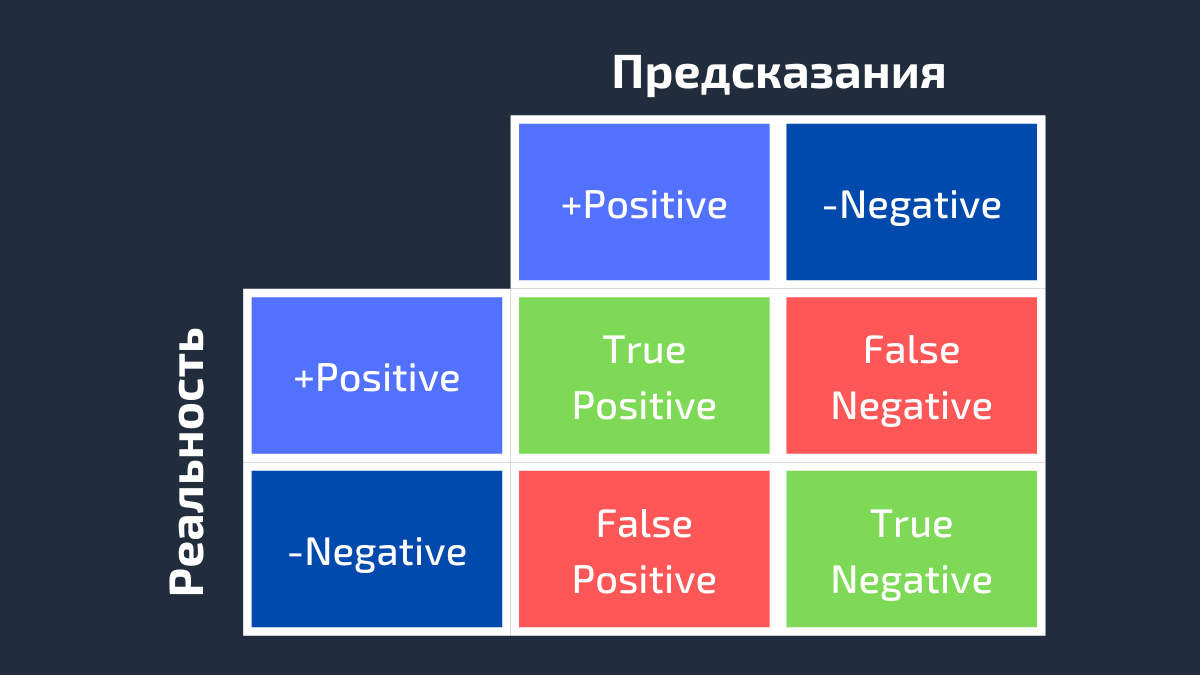

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  9],
       [26, 30]], dtype=int64)

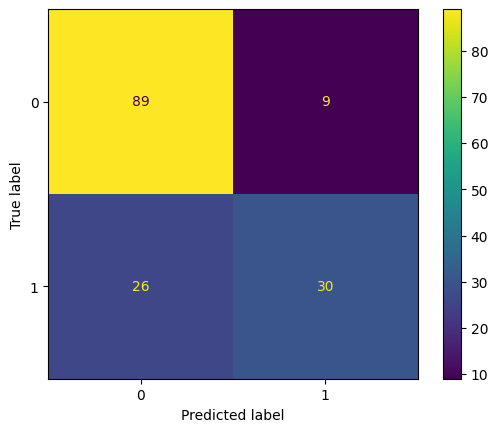

In [67]:
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

In [71]:
model.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [70]:
model.predict_proba(X_test_scaled)

array([[0.61904762, 0.38095238],
       [0.85714286, 0.14285714],
       [0.52380952, 0.47619048],
       [0.52380952, 0.47619048],
       [0.42857143, 0.57142857],
       [0.71428571, 0.28571429],
       [0.9047619 , 0.0952381 ],
       [0.66666667, 0.33333333],
       [0.47619048, 0.52380952],
       [0.76190476, 0.23809524],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.61904762, 0.38095238],
       [0.47619048, 0.52380952],
       [0.80952381, 0.19047619],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.9047619 , 0.0952381 ],
       [0.61904762, 0.38095238],
       [0.23809524, 0.76190476],
       [0.9047619 , 0.0952381 ],
       [0.80952381, 0.19047619],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.80952381, 0.19047619],
       [0.95238095, 0.04761905],
       [0.47619048, 0.52380952],
       [0.85714286, 0.14285714],
       [0.9047619 , 0.0952381 ],
       [0.

In [74]:
model.predict(X_test_scaled)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [77]:
ths = 0.5
props = model.predict_proba(X_test_scaled)[:, 1]
(props > ths) * 1

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0])

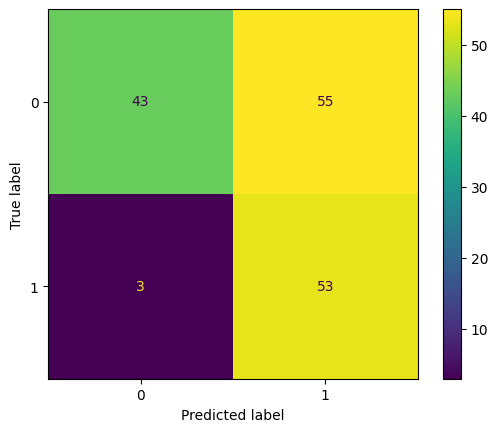

In [80]:
ths = 0.1
props = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (props > ths) * 1
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

In [81]:
from sklearn.metrics import roc_curve, auc


In [84]:
props = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thrs = roc_curve(y_test, props)
roc_auc = auc(fpr, tpr)

In [85]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01020408, 0.01020408, 0.05102041, 0.09183673, 0.15306122,
       0.17346939, 0.2244898 , 0.28571429, 0.33673469, 0.36734694,
       0.46938776, 0.56122449, 0.66326531, 0.79591837, 1.        ])

In [86]:
tpr

array([0.        , 0.01785714, 0.07142857, 0.16071429, 0.19642857,
       0.26785714, 0.33928571, 0.42857143, 0.53571429, 0.60714286,
       0.71428571, 0.80357143, 0.875     , 0.875     , 0.89285714,
       0.94642857, 0.94642857, 0.98214286, 0.98214286, 1.        ])

In [87]:
thrs

array([       inf, 0.85714286, 0.80952381, 0.76190476, 0.71428571,
       0.66666667, 0.61904762, 0.57142857, 0.52380952, 0.47619048,
       0.42857143, 0.38095238, 0.33333333, 0.28571429, 0.23809524,
       0.19047619, 0.14285714, 0.0952381 , 0.04761905, 0.        ])

In [88]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'False positive rate')

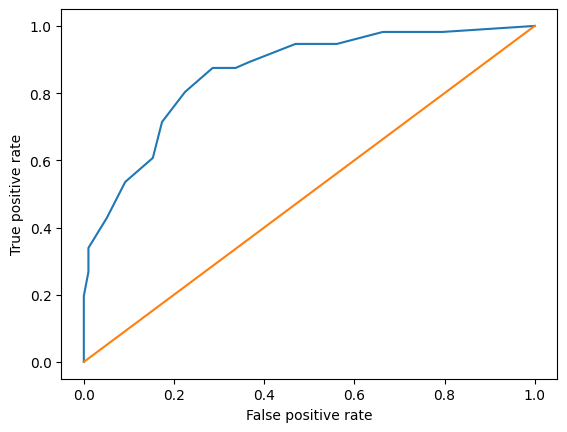

In [92]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
TPR = TP / (TP + FN).

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
FPR = FP / (FP + TN).

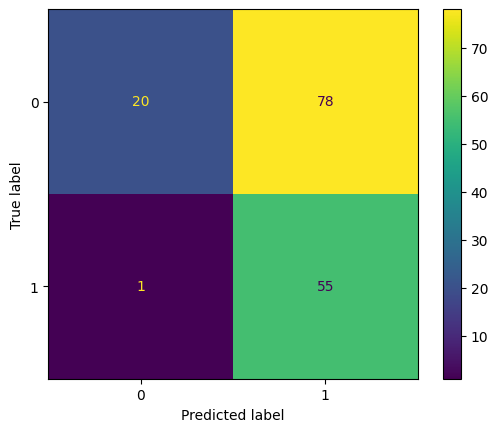

In [94]:
ths = 0.0
props = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (props > ths) * 1
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                      display_labels=model.classes_)
cmd.plot()

https://pythonru.com/baza-znanij/sklearn-roc-auc

Порог можно менять

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
y_pred = model.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.6753246753246753

In [102]:
grid = {
    "max_features": ["sqrt", "log2"],
    "max_depth": list(range(1, 30)),
    "criterion": ["gini", "entropy"]
}
grid

{'max_features': ['sqrt', 'log2'],
 'max_depth': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'criterion': ['gini', 'entropy']}

In [103]:
search = GridSearchCV(DecisionTreeClassifier(), grid, n_jobs=15, verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=15,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'max_features': ['sqrt', 'log2']},
             verbose=1)

In [104]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}

In [105]:
model = search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6818181818181818

In [111]:
from sklearn import tree

print(tree.export_text(model, feature_names=X.columns))

|--- Age <= 30.50
|   |--- SkinThickness <= 22.50
|   |   |--- BMI <= 29.50
|   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |--- Pregnancies <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  2.50
|   |   |   |   |   |--- class: 1
|   |   |--- BMI >  29.50
|   |   |   |--- BMI <= 29.75
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  29.75
|   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  24.50
|   |   |   |   |   |--- Glucose <= 147.00
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.73
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Glucose >  147.00
|   |   |   |   |   |   |--- class: 1
|   |--- SkinThickness >  22.50
|   |   |--- BMI <= 25.50
|   |   |   |--- class: 0
|   |   |-

[Text(0.31214488636363635, 0.96875, 'Age <= 30.5\nentropy = 0.93\nsamples = 614\nvalue = [402, 212]'),
 Text(0.13011363636363638, 0.90625, 'SkinThickness <= 22.5\nentropy = 0.728\nsamples = 315\nvalue = [251, 64]'),
 Text(0.03636363636363636, 0.84375, 'BMI <= 29.5\nentropy = 0.317\nsamples = 87\nvalue = [82, 5]'),
 Text(0.01818181818181818, 0.78125, 'DiabetesPedigreeFunction <= 0.672\nentropy = 0.112\nsamples = 67\nvalue = [66, 1]'),
 Text(0.00909090909090909, 0.71875, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]'),
 Text(0.02727272727272727, 0.71875, 'Pregnancies <= 2.5\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]'),
 Text(0.01818181818181818, 0.65625, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.03636363636363636, 0.65625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05454545454545454, 0.78125, 'BMI <= 29.75\nentropy = 0.722\nsamples = 20\nvalue = [16, 4]'),
 Text(0.045454545454545456, 0.71875, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.063636363636

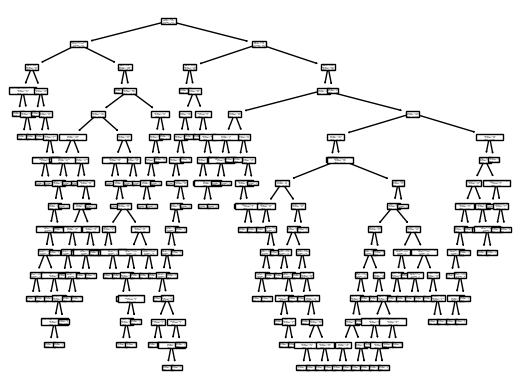

In [114]:
# plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=list(X_test.columns))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Text(0.5, 0.875, 'Glucose <= 127.5\nentropy = 0.93\nsamples = 614\nvalue = [402, 212]'),
 Text(0.25, 0.625, 'Glucose <= 99.5\nentropy = 0.712\nsamples = 384\nvalue = [309, 75]'),
 Text(0.125, 0.375, 'Glucose <= 83.5\nentropy = 0.348\nsamples = 153\nvalue = [143, 10]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.46\nsamples = 103\nvalue = [93, 10]'),
 Text(0.375, 0.375, 'Age <= 28.5\nentropy = 0.857\nsamples = 231\nvalue = [166, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.54\nsamples = 113\nvalue = [99, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.987\nsamples = 118\nvalue = [67, 51]'),
 Text(0.75, 0.625, 'Glucose <= 154.5\nentropy = 0.973\nsamples = 230\nvalue = [93, 137]'),
 Text(0.625, 0.375, 'BMI <= 27.8\nentropy = 0.993\nsamples = 131\nvalue = [72, 59]'),
 Text(0.5625, 0.125, 'entropy = 0.579\nsamples = 29\nvalue = [25, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples = 102\nvalue = [47, 55]'),
 Text(0.875, 0.375, 'SkinThic

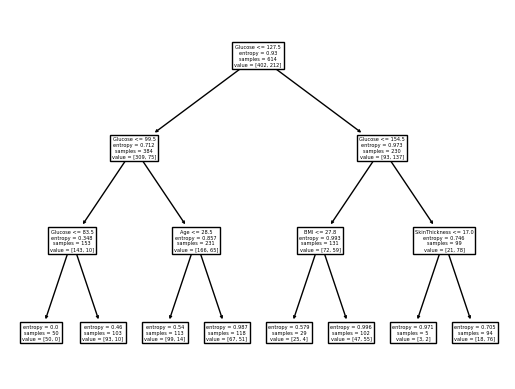

In [116]:
grid = {
    "max_features": ["sqrt", "log2"],
    "max_depth": [1, 2, 3],
    "criterion": ["gini", "entropy"]
}
search = GridSearchCV(DecisionTreeClassifier(), grid, n_jobs=15, verbose=1)
search.fit(X_train, y_train)
model = search.best_estimator_
model.fit(X_train, y_train)

tree.plot_tree(model, feature_names=list(X_test.columns))

In [118]:
print(tree.export_text(model, feature_names=list(X_test.columns)))

|--- Glucose <= 127.50
|   |--- Glucose <= 99.50
|   |   |--- Glucose <= 83.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  83.50
|   |   |   |--- class: 0
|   |--- Glucose >  99.50
|   |   |--- Age <= 28.50
|   |   |   |--- class: 0
|   |   |--- Age >  28.50
|   |   |   |--- class: 0
|--- Glucose >  127.50
|   |--- Glucose <= 154.50
|   |   |--- BMI <= 27.80
|   |   |   |--- class: 0
|   |   |--- BMI >  27.80
|   |   |   |--- class: 1
|   |--- Glucose >  154.50
|   |   |--- SkinThickness <= 17.00
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  17.00
|   |   |   |--- class: 1



In [120]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2'}

In [121]:
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [122]:
search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

Построение дерева происходит по следующему алгоритму:

1. Выбирается признак, по которому происходит разделение выборки.
2. Выбирается пороговое значение для этого признака.
3. Разделяется выборка на две части: объекты, у которых значение признака меньше или равно порогу, и объекты, у которых значение признака больше порога.
4. Для каждой из двух полученных подвыборок рекурсивно повторяются шаги 1-3, пока не будет достигнут критерий останова (например, глубина дерева, количество объектов в листе и т.д.).
5. В листе дерева выводится ответ — класс.

Логистическая регрессия

#### Использование метода опорных векторов для классификации

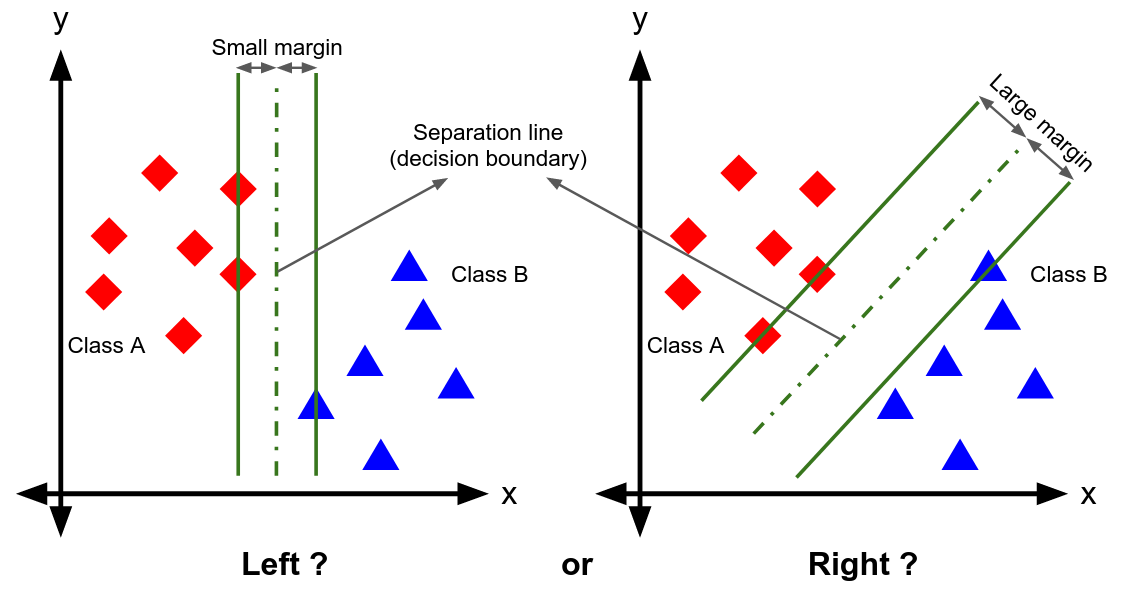

In [125]:
from sklearn import svm
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7792207792207793

In [127]:
from sklearn import svm
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7792207792207793